In [18]:
#Importing the packages
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [6]:
#Importing the data from quandl
quandl.ApiConfig.api_key="dqm7Pv5xxLbsF_HQG9kZ"
df=quandl.get("WIKI/AMZN")
df=df[["Adj. Close"]]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


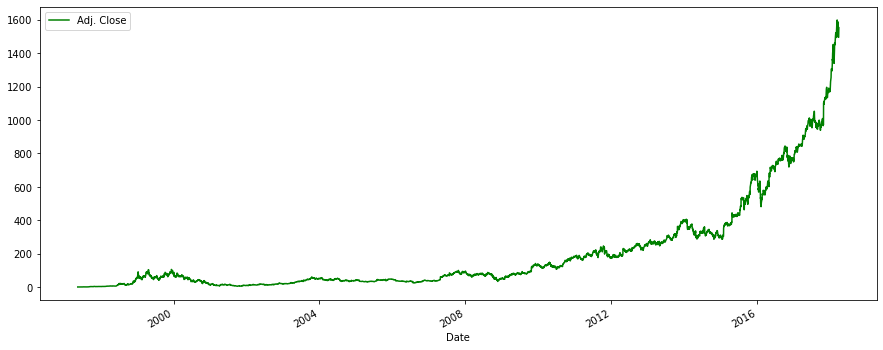

In [7]:
#Ploting the Adj .Close Column
df["Adj. Close"].plot(figsize=(15,6),color="g")
plt.legend(loc="upper left")
plt.show()

In [8]:
#creating the prediction values
forecast=30
df["Prediction"]=df[["Adj. Close"]].shift(-forecast)
df

,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000
...,...,...
2018-03-21,1581.860000,NaN
2018-03-22,1544.100000,NaN
2018-03-23,1495.560000,NaN


In [11]:
x=np.array(df.drop(["Prediction"],1))
x=preprocessing.scale(x)

In [13]:
x_forecast=x[-forecast:]
x=x[:-forecast]

In [14]:
y=np.array(df["Prediction"])
y=y[:-forecast]

In [17]:
#Applying the linear model
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

clf=LinearRegression()
clf.fit(x_train, y_train)

forecast_predicted=clf.predict(x_forecast)
print(forecast_predicted)

[1499.09929104 1537.91168697 1549.28773405 1535.40492029 1556.28756134
 1571.763659   1573.71808726 1589.90585173 1613.22090621 1602.63087919
 1603.13010814 1582.94851201 1590.17139905 1614.9841404  1629.88665585
 1637.70436888 1644.99098727 1673.70196324 1694.414654   1683.56970156
 1686.5650753  1677.34527244 1666.0435786  1637.63001563 1681.79584548
 1676.85666537 1636.74839854 1585.18973137 1649.23974435 1586.77239339]


(17282.0, 18029.5)

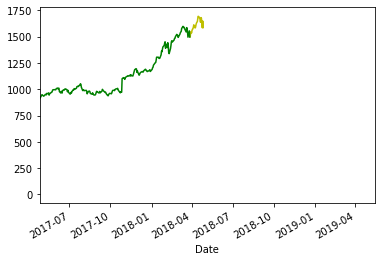

In [19]:
#Visualizing the data
dates=pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted,color="y")
df["Adj. Close"].plot(color="g")
plt.xlim(xmin=datetime.date(2017,4,26))